# Subset + Clean Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('complaints.csv')
df.head()

C:\Users\Zh_uu\AppData\Local\Temp\ipykernel_24688\638734534.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",SC,29161,NaN,NaN,Web,2024-10-17,In progress,Yes,NaN,10493720
1,2024-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,35209,NaN,NaN,Web,2024-10-17,In progress,Yes,NaN,10483298
2,2024-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",CA,91316,NaN,NaN,Web,2024-10-17,In progress,Yes,NaN,10493015
3,2024-10-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"EQUIFAX, INC.",NY,11413,NaN,NaN,Web,2024-10-17,In progress,Yes,NaN,10493022
4,2024-10-17,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,11434,NaN,NaN,Web,2024-10-17,In progress,Yes,NaN,10483162


In [28]:
df['Date received'] = pd.to_datetime(df['Date received'])

df_subset = df[(df['Date received'].dt.year == 2022) | (df['Date received'].dt.year == 2023)]

print(df_subset.shape)

(2092500, 18)


C:\Users\Zh_uu\AppData\Local\Temp\ipykernel_24688\2603502313.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_complaints = df_subset.groupby(pd.Grouper(key='Date received', freq='M')).size()


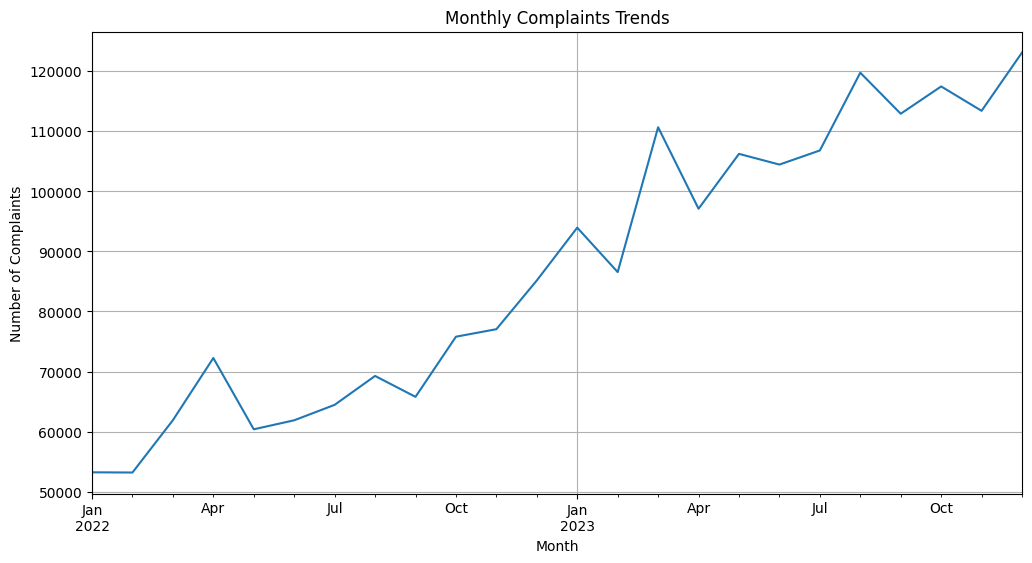

In [29]:
monthly_complaints = df_subset.groupby(pd.Grouper(key='Date received', freq='M')).size()

plt.figure(figsize=(12, 6))
monthly_complaints.plot(title='Monthly Complaints Trends')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True)
plt.show()

In [30]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2092500 entries, 16690 to 6486746
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Tags                          object        
 11  Consumer consent provided?    object        
 12  Submitted via                 object        
 13  Date sent to company          object        
 14  Company response to consumer  object        
 15  Timely response?              obj

In [31]:
# number and percentage of missing values according to columns
{col: [df_subset[col].isnull().sum(), f'% {np.round(np.mean(df_subset[col].isnull()*100), 3)}'
      ] for col in df_subset.columns if df_subset[col].isnull().any()}

{'Sub-product': [27, '% 0.001'],
 'Sub-issue': [85930, '% 4.107'],
 'Consumer complaint narrative': [1267838, '% 60.59'],
 'Company public response': [867152, '% 41.441'],
 'State': [5593, '% 0.267'],
 'ZIP code': [284, '% 0.014'],
 'Tags': [1932825, '% 92.369'],
 'Consumer consent provided?': [80821, '% 3.862'],
 'Company response to consumer': [6, '% 0.0'],
 'Consumer disputed?': [2092500, '% 100.0']}

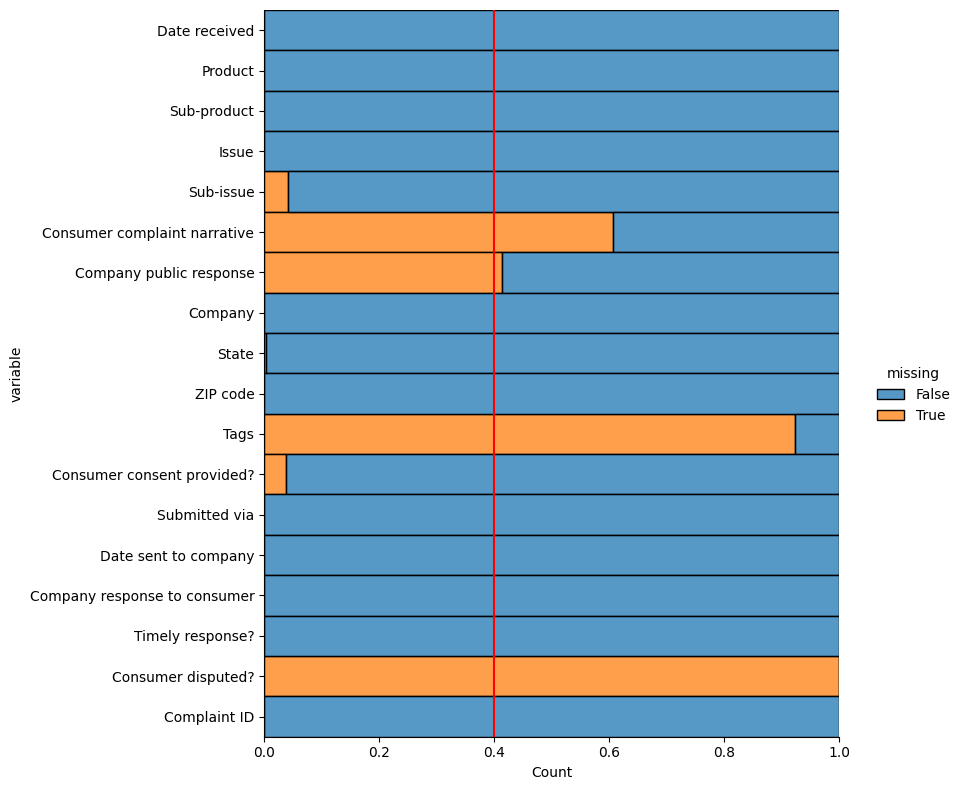

In [32]:
sns.displot(
    data=df_subset.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

In [33]:
columns_to_dropna = ['Sub-product', 'Issue', 'Sub-issue', 'State', 'ZIP code', 'Company response to consumer', 'Consumer consent provided?']
df_subset = df_subset.dropna(subset=columns_to_dropna)

columns_to_fill_unknown = ['Consumer complaint narrative', 'Company public response']
df_subset[columns_to_fill_unknown] = df_subset[columns_to_fill_unknown].fillna('unknown')

df_subset = df_subset.drop(columns=['Tags'])
df_subset = df_subset.drop(columns=['Consumer disputed?'])

df_subset = df_subset[~df_subset['ZIP code'].str.contains('X', na=False)]

print(df_subset.shape)
print(df_subset.isnull().sum())

(1726558, 16)
Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Complaint ID                    0
dtype: int64


In [35]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1726558 entries, 16690 to 6486746
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       object        
 8   State                         object        
 9   ZIP code                      object        
 10  Consumer consent provided?    object        
 11  Submitted via                 object        
 12  Date sent to company          object        
 13  Company response to consumer  object        
 14  Timely response?              object        
 15  Complaint ID                  int

In [36]:
df_subset['Consumer complaint narrative'] = df_subset['Consumer complaint narrative'].astype(str)
df_subset['Company public response'] = df_subset['Company public response'].astype(str)

df_subset['Product'] = df_subset['Product'].astype('category')
df_subset['Sub-product'] = df_subset['Sub-product'].astype('category')
df_subset['Issue'] = df_subset['Issue'].astype('category')
df_subset['Sub-issue'] = df_subset['Sub-issue'].astype('category')
df_subset['Company'] = df_subset['Company'].astype('category')
df_subset['State'] = df_subset['State'].astype('category')
df_subset['Consumer consent provided?'] = df_subset['Consumer consent provided?'].astype('category')
df_subset['Submitted via'] = df_subset['Submitted via'].astype('category')
df_subset['Company response to consumer'] = df_subset['Company response to consumer'].astype('category')


df_subset['Timely response?'] = df_subset['Timely response?'].map({'Yes': True, 'No': False})

df_subset['ZIP code'] = df_subset['ZIP code'].astype(int)

df_subset['Date sent to company'] = pd.to_datetime(df_subset['Date sent to company'])

In [38]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1726558 entries, 16690 to 6486746
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       category      
 2   Sub-product                   category      
 3   Issue                         category      
 4   Sub-issue                     category      
 5   Consumer complaint narrative  object        
 6   Company public response       object        
 7   Company                       category      
 8   State                         category      
 9   ZIP code                      int32         
 10  Consumer consent provided?    category      
 11  Submitted via                 category      
 12  Date sent to company          datetime64[ns]
 13  Company response to consumer  category      
 14  Timely response?              bool          
 15  Complaint ID                  int

# EDA

In [39]:
df_subset.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
              'Credit reporting or other personal consumer reports':'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

C:\Users\Zh_uu\AppData\Local\Temp\ipykernel_24688\1120254994.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_subset.replace({'Product':


C:\Users\Zh_uu\AppData\Local\Temp\ipykernel_24688\4024683105.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_subset.groupby('Product')['Consumer complaint narrative'].count().sort_values().plot.barh(


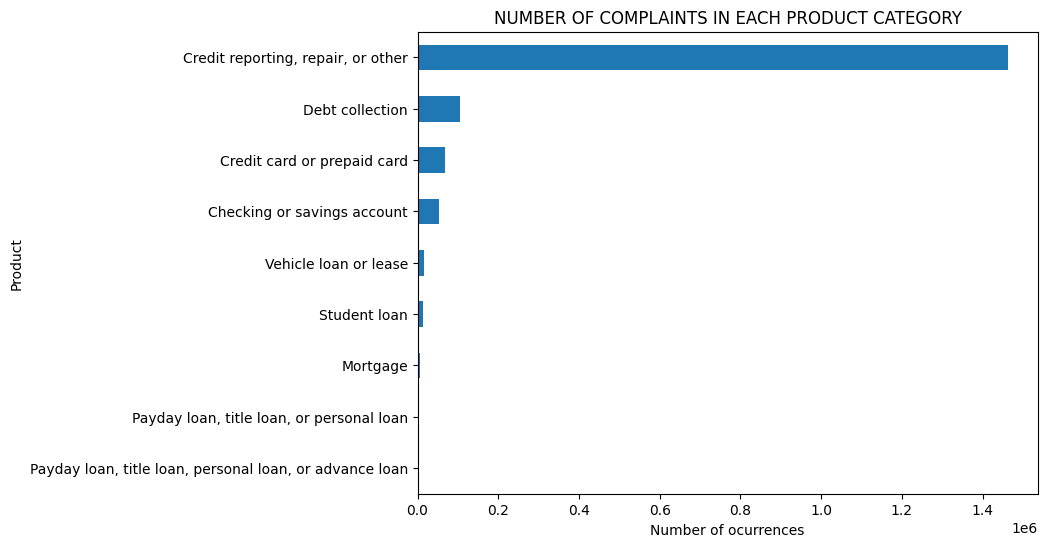

In [40]:
fig = plt.figure(figsize=(8,6))
df_subset.groupby('Product')['Consumer complaint narrative'].count().sort_values().plot.barh(
    ylim=0,title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY')
plt.xlabel('Number of ocurrences', fontsize = 10);

C:\Users\Zh_uu\AppData\Local\Temp\ipykernel_24688\1228516148.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_subset.groupby('State')['Consumer complaint narrative'].count().sort_values().plot.barh(


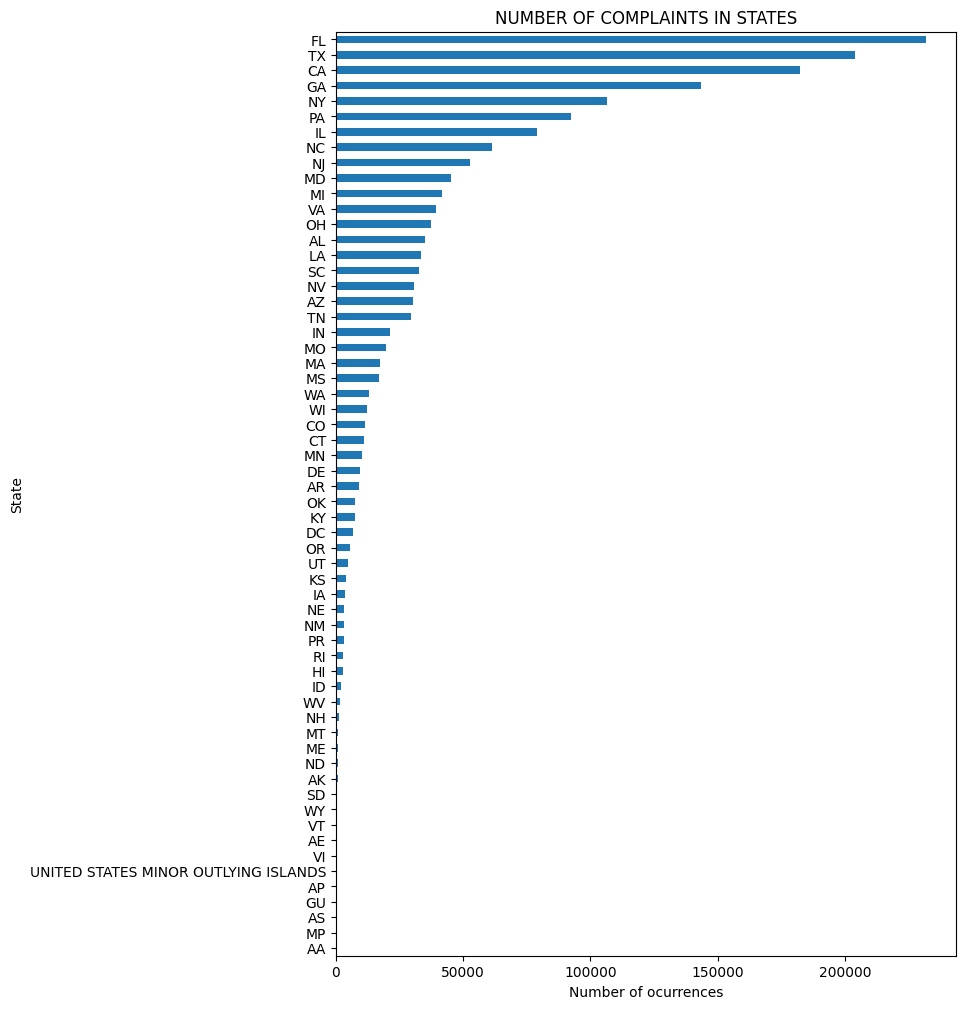

In [41]:
fig = plt.figure(figsize=(8,12))
df_subset.groupby('State')['Consumer complaint narrative'].count().sort_values().plot.barh(
    ylim=0,title= 'NUMBER OF COMPLAINTS IN STATES')
plt.xlabel('Number of ocurrences', fontsize = 10);

<Axes: ylabel='count'>

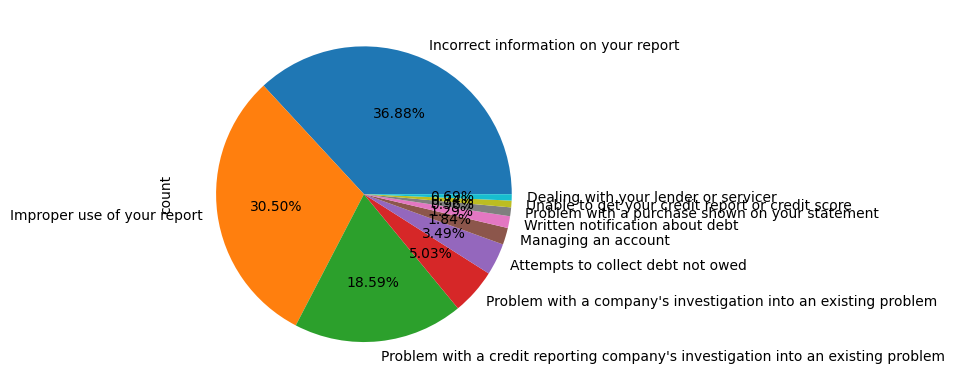

In [42]:
df_subset["Issue"].value_counts().head(10).plot(kind="pie", autopct="%.2f%%")

# Clean text data

In [50]:
import numpy as np
import pandas as pd
import re
import nltk
# import spacy
import string
pd.options.mode.chained_assignment = None

In [43]:
df_subset = df_subset[~df_subset['Consumer complaint narrative'].str.contains('unknown', na=False)]

print(df_subset.shape)

(581530, 16)


# Lower Casing

In [44]:
df_subset["Processed Complaint"] = df_subset["Consumer complaint narrative"].str.lower()
df_subset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Processed Complaint
16762,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,unknown,"EQUIFAX, INC.",MI,48212,Consent provided,Web,2022-06-07,Closed with explanation,True,5641602,in accordance with the fair credit reporting a...
20146,2023-12-14,"Credit reporting, repair, or other",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,MY PERONAL INFORMATION WAS SOLD AND BOUGHT ILL...,unknown,"EQUIFAX, INC.",NY,10472,Consent provided,Web,2023-12-14,Closed with non-monetary relief,True,8002415,my peronal information was sold and bought ill...
20480,2023-11-07,Mortgage,Conventional home mortgage,Closing on a mortgage,Closing disclosure or other related disclosures,Did a refi with Lord Loans of XXXX XXXX Florid...,unknown,"LORD MORTGAGE & LOAN, INC.",FL,33433,Consent provided,Web,2023-12-21,Closed with explanation,False,7816830,did a refi with lord loans of xxxx xxxx florid...
20540,2022-06-29,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,unknown,"EQUIFAX, INC.",IL,60148,Consent provided,Web,2022-06-29,Closed with explanation,True,5722002,hi i am submitting this xxxx xxxx this isn't a...
20674,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Account information incorrect,Disputed and added remarks to three negative a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60409,Consent provided,Web,2022-06-07,Closed with explanation,True,5641724,disputed and added remarks to three negative a...


# Removal of Punctuations

In [51]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df_subset["Processed Complaint"] = df_subset["Processed Complaint"].apply(lambda text: remove_punctuation(text))
df_subset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Processed Complaint
16762,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,unknown,"EQUIFAX, INC.",MI,48212,Consent provided,Web,2022-06-07,Closed with explanation,True,5641602,in accordance with the fair credit reporting a...
20146,2023-12-14,"Credit reporting, repair, or other",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,MY PERONAL INFORMATION WAS SOLD AND BOUGHT ILL...,unknown,"EQUIFAX, INC.",NY,10472,Consent provided,Web,2023-12-14,Closed with non-monetary relief,True,8002415,my peronal information was sold and bought ill...
20480,2023-11-07,Mortgage,Conventional home mortgage,Closing on a mortgage,Closing disclosure or other related disclosures,Did a refi with Lord Loans of XXXX XXXX Florid...,unknown,"LORD MORTGAGE & LOAN, INC.",FL,33433,Consent provided,Web,2023-12-21,Closed with explanation,False,7816830,did a refi with lord loans of xxxx xxxx florid...
20540,2022-06-29,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,unknown,"EQUIFAX, INC.",IL,60148,Consent provided,Web,2022-06-29,Closed with explanation,True,5722002,hi i am submitting this xxxx xxxx this isnt an...
20674,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Account information incorrect,Disputed and added remarks to three negative a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60409,Consent provided,Web,2022-06-07,Closed with explanation,True,5641724,disputed and added remarks to three negative a...


# Removal of stopwords

In [52]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [55]:
STOPWORDS = set(stopwords.words('english'))

custom_words = ['xxxxxxxx', 'xxxx']
STOPWORDS.update(custom_words)

print(STOPWORDS)

{'shan', 'wouldn', 'and', 'if', 'are', "won't", 'to', 'have', 'against', 'ours', 'o', "hasn't", 'haven', 's', 'on', 'any', 'both', 'having', 'had', 'each', 'same', 'his', 'them', 'being', 'while', 'theirs', 'through', "haven't", 'of', 'm', 'very', 'hasn', 'xxxx', "don't", 'him', 'its', 'll', 'all', 'when', 'this', 'then', 'aren', 'it', 'few', 'yours', 'there', 'off', 'they', "didn't", 'nor', "isn't", 'ain', 'an', 'i', 'wasn', 'by', 'needn', 'above', 'didn', 'is', 'ourselves', "you'd", 'me', 'weren', 'such', 'the', 'after', "it's", 'down', "wasn't", 'herself', 'but', "should've", 'he', "you've", 'has', 'will', 'couldn', "doesn't", 'been', 'd', 'she', 'than', 'so', 'more', 'doing', 'should', "that'll", 'too', 'other', 'do', "needn't", 'my', 'mustn', 'her', 'won', 'itself', 'myself', "wouldn't", 'now', 'who', 'with', 'for', "couldn't", "hadn't", 'hadn', 'isn', 'because', 'just', 'what', 'xxxxxxxx', 'why', 'own', 'their', 'out', 'how', 'between', 'some', 'during', 'further', "shouldn't", '

In [56]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df_subset["Processed Complaint"] = df_subset["Processed Complaint"].apply(lambda text: remove_stopwords(text))
df_subset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Processed Complaint
16762,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,unknown,"EQUIFAX, INC.",MI,48212,Consent provided,Web,2022-06-07,Closed with explanation,True,5641602,accordance fair credit reporting act account v...
20146,2023-12-14,"Credit reporting, repair, or other",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,MY PERONAL INFORMATION WAS SOLD AND BOUGHT ILL...,unknown,"EQUIFAX, INC.",NY,10472,Consent provided,Web,2023-12-14,Closed with non-monetary relief,True,8002415,peronal information sold bought illegally vict...
20480,2023-11-07,Mortgage,Conventional home mortgage,Closing on a mortgage,Closing disclosure or other related disclosures,Did a refi with Lord Loans of XXXX XXXX Florid...,unknown,"LORD MORTGAGE & LOAN, INC.",FL,33433,Consent provided,Web,2023-12-21,Closed with explanation,False,7816830,refi lord loans florida failed file deed timel...
20540,2022-06-29,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,unknown,"EQUIFAX, INC.",IL,60148,Consent provided,Web,2022-06-29,Closed with explanation,True,5722002,hi submitting isnt influence third party low u...
20674,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Account information incorrect,Disputed and added remarks to three negative a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60409,Consent provided,Web,2022-06-07,Closed with explanation,True,5641724,disputed added remarks three negative accounts...


# Frequent Words

In [57]:
from collections import Counter
cnt = Counter()
for text in df_subset["Processed Complaint"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('credit', 1174102),
 ('account', 928278),
 ('information', 785228),
 ('report', 741687),
 ('consumer', 735130),
 ('reporting', 670823),
 ('15', 506229),
 ('usc', 431652),
 ('section', 424272),
 ('accounts', 310472)]

In [61]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zh_uu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zh_uu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# Lemmatization

In [64]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_subset["Processed Complaint"] = df_subset["Processed Complaint"].apply(lambda text: lemmatize_words(text))
df_subset.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Processed Complaint
16762,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,unknown,"EQUIFAX, INC.",MI,48212,Consent provided,Web,2022-06-07,Closed with explanation,True,5641602,accordance fair credit reporting act account v...
20146,2023-12-14,"Credit reporting, repair, or other",Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,MY PERONAL INFORMATION WAS SOLD AND BOUGHT ILL...,unknown,"EQUIFAX, INC.",NY,10472,Consent provided,Web,2023-12-14,Closed with non-monetary relief,True,8002415,peronal information sell buy illegally victim ...
20480,2023-11-07,Mortgage,Conventional home mortgage,Closing on a mortgage,Closing disclosure or other related disclosures,Did a refi with Lord Loans of XXXX XXXX Florid...,unknown,"LORD MORTGAGE & LOAN, INC.",FL,33433,Consent provided,Web,2023-12-21,Closed with explanation,False,7816830,refi lord loan florida fail file deed timely r...
20540,2022-06-29,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Information belongs to someone else,Hi I am submitting this XXXX XXXX this isn't a...,unknown,"EQUIFAX, INC.",IL,60148,Consent provided,Web,2022-06-29,Closed with explanation,True,5722002,hi submit isnt influence third party low unfai...
20674,2022-06-07,"Credit reporting, repair, or other",Credit reporting,Incorrect information on your report,Account information incorrect,Disputed and added remarks to three negative a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,60409,Consent provided,Web,2022-06-07,Closed with explanation,True,5641724,dispute add remark three negative account tran...


In [65]:
from nltk import bigrams, trigrams
from nltk.tokenize import word_tokenize

df_subset['bigrams'] = df_subset['Processed Complaint'].apply(lambda x: list(bigrams(word_tokenize(x))))

df_subset['trigrams'] = df_subset['Processed Complaint'].apply(lambda x: list(trigrams(word_tokenize(x))))

print(df_subset[['Date received','Processed Complaint', 'bigrams', 'trigrams']].head())

      Date received                                Processed Complaint  \
16762    2022-06-07  accordance fair credit reporting act account v...   
20146    2023-12-14  peronal information sell buy illegally victim ...   
20480    2023-11-07  refi lord loan florida fail file deed timely r...   
20540    2022-06-29  hi submit isnt influence third party low unfai...   
20674    2022-06-07  dispute add remark three negative account tran...   

                                                 bigrams  \
16762  [(accordance, fair), (fair, credit), (credit, ...   
20146  [(peronal, information), (information, sell), ...   
20480  [(refi, lord), (lord, loan), (loan, florida), ...   
20540  [(hi, submit), (submit, isnt), (isnt, influenc...   
20674  [(dispute, add), (add, remark), (remark, three...   

                                                trigrams  
16762  [(accordance, fair, credit), (fair, credit, re...  
20146  [(peronal, information, sell), (information, s...  
20480  [(refi, lo

In [66]:
df2=df_subset
df2['bigrams'] = df_subset['Processed Complaint'].apply(
    lambda x: ['_'.join(bigram) for bigram in bigrams(word_tokenize(x))] + word_tokenize(x)
)

# 打印部分结果以检查
print(df2[['Date received', 'Processed Complaint', 'bigrams']].head())

      Date received                                Processed Complaint  \
16762    2022-06-07  accordance fair credit reporting act account v...   
20146    2023-12-14  peronal information sell buy illegally victim ...   
20480    2023-11-07  refi lord loan florida fail file deed timely r...   
20540    2022-06-29  hi submit isnt influence third party low unfai...   
20674    2022-06-07  dispute add remark three negative account tran...   

                                                 bigrams  
16762  [accordance_fair, fair_credit, credit_reportin...  
20146  [peronal_information, information_sell, sell_b...  
20480  [refi_lord, lord_loan, loan_florida, florida_f...  
20540  [hi_submit, submit_isnt, isnt_influence, influ...  
20674  [dispute_add, add_remark, remark_three, three_...  
